### DATASET: WINE

In [16]:
### Caso dê erro na importação de uma biblioteca, rode o código abaixo com a biblioteca que o problema ocorreu
#import pyodide_js
#await pyodide_js.loadPackage('matplotlib')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)

input = wine.data
output = wine.target
print(f'Dados de input: \n {input}')
print(f'Dados de output: \n {output}')

Dados de input: 
      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols   
0      14.23        1.71  2.43               15.6      127.0           2.80  \
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phe

# Análise dos dados

### Valores ausentes

In [18]:
import pandas as pd

# Verificando se existem valores ausentes no dataframe
valores_ausentes = wine.data.isnull().sum()

# Exibir as colunas com valores ausentes
colunas_com_valores_ausentes = valores_ausentes[valores_ausentes > 0]

if sum(valores_ausentes) > 0:
        print(f'{sum(valores_ausentes)} valores ausentes encontrados')
        print(f'Colunas com valores ausentes: {colunas_com_valores_ausentes}')
else:
    print(f'Não há dados ausentes no dataframe')
    
    

Não há dados ausentes no dataframe


### Estatísticas descritivas

In [19]:
# Calcular as estatísticas descritivas
estatisticas_descritivas = wine.data.describe()
print(estatisticas_descritivas)

# Verificar a distribuição das classes
contagem_classes = pd.Series(wine.target).value_counts()
print(contagem_classes)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium   
count  178.000000  178.000000  178.000000         178.000000  178.000000  \
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins   
count     178.000000  178.000000            178.000000       178.000000  \
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

### BoxPlot

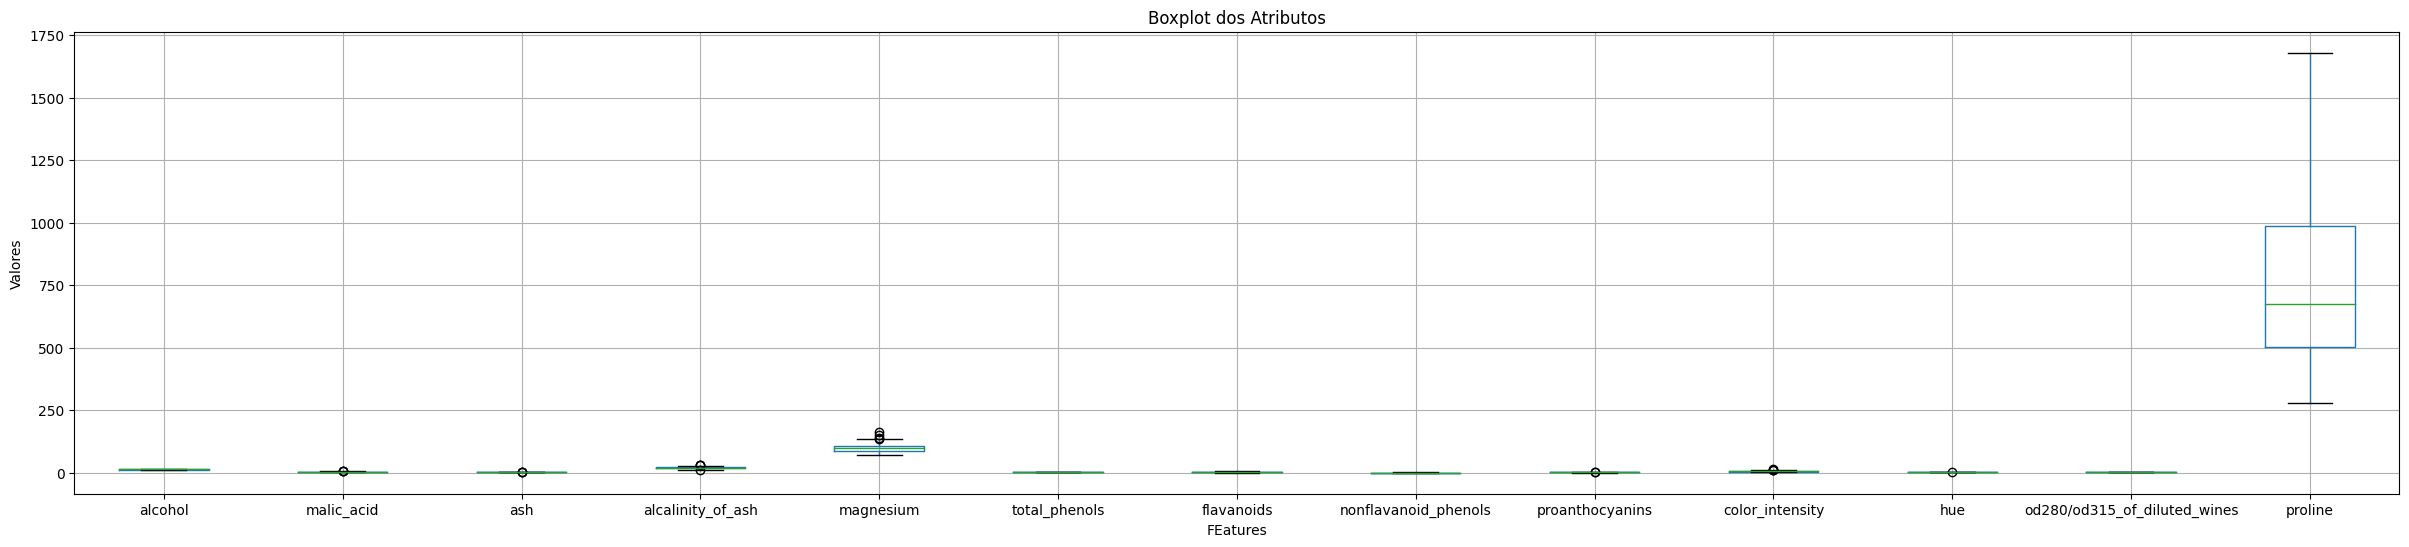

In [20]:
# Criar o boxplot
# Ajustar o tamanho da figura
plt.figure(figsize=(30, 6))  # Especifica as dimensões da figura (largura, altura)

wine.data.boxplot(column=wine.feature_names)
plt.title("Boxplot dos Atributos")
plt.xlabel("FEatures")
plt.ylabel("Valores")
plt.show()

## Comentários

In [21]:
### Vejo a necessidade de normalizar a feature proline. Ela está em uma escala diferente das demais.

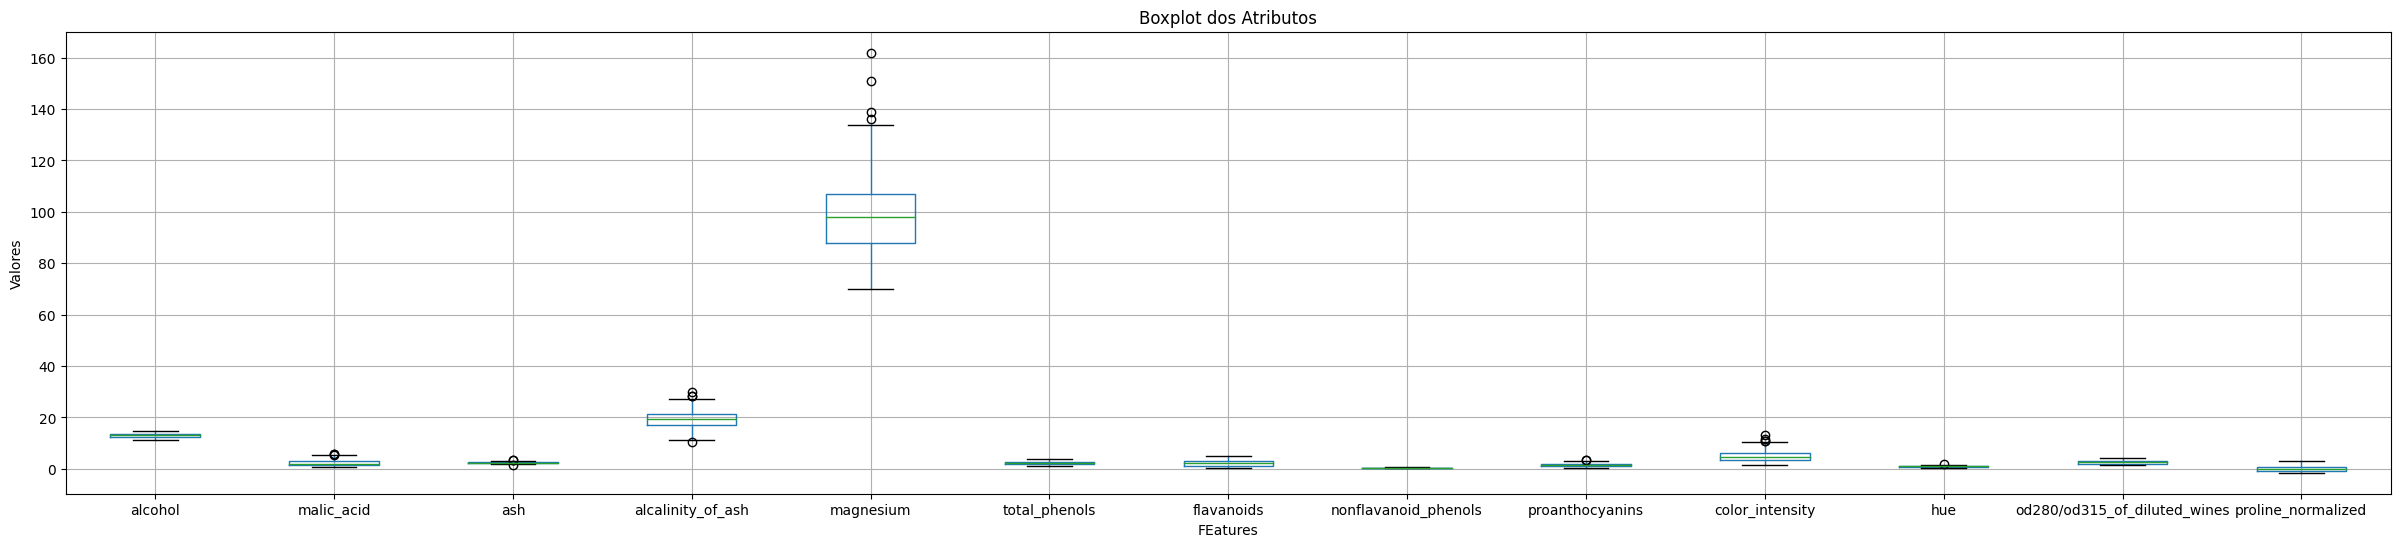

In [22]:
# Normalizando a coluna proline

from sklearn.preprocessing import StandardScaler
# Criar um objeto StandardScaler
scaler = StandardScaler()


# Normalizar a coluna "profile"
wine.data['proline_normalized'] = scaler.fit_transform(wine.data[['proline']])

colunas = wine.feature_names
colunas.append('proline_normalized')
colunas.remove('proline')


plt.figure(figsize=(30, 6))  # Especifica as dimensões da figura (largura, altura)

wine.data.boxplot(column=colunas)
plt.title("Boxplot dos Atributos")
plt.xlabel("FEatures")
plt.ylabel("Valores")
plt.show()

In [23]:
### Vejo a necessidade de normalizar a feature magnesium. Ela está em uma escala diferente das demai, e também possui outliers.

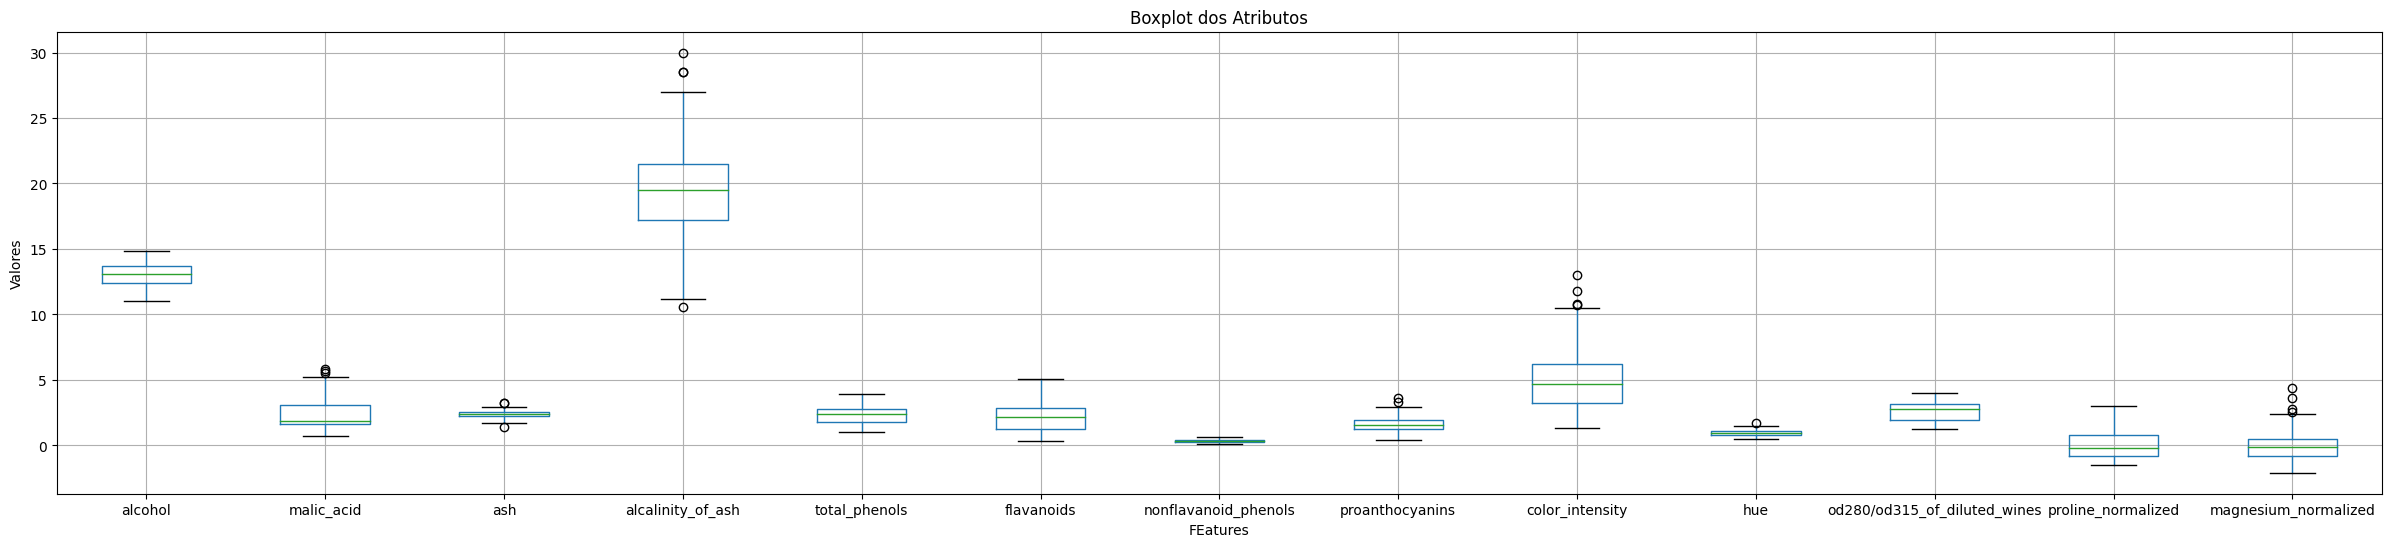

In [24]:
# Normalizando a coluna magnesium

from sklearn.preprocessing import StandardScaler
# Criar um objeto StandardScaler
scaler = StandardScaler()


# Normalizar a coluna "profile"
wine.data['magnesium_normalized'] = scaler.fit_transform(wine.data[['magnesium']])

colunas.append('magnesium_normalized')
colunas.remove('magnesium')


plt.figure(figsize=(30, 6))  # Especifica as dimensões da figura (largura, altura)

wine.data.boxplot(column=colunas)
plt.title("Boxplot dos Atributos")
plt.xlabel("FEatures")
plt.ylabel("Valores")
plt.show()

# Visualizações: Histogramas, Gráfico de barras e Gráfico de Dispersão

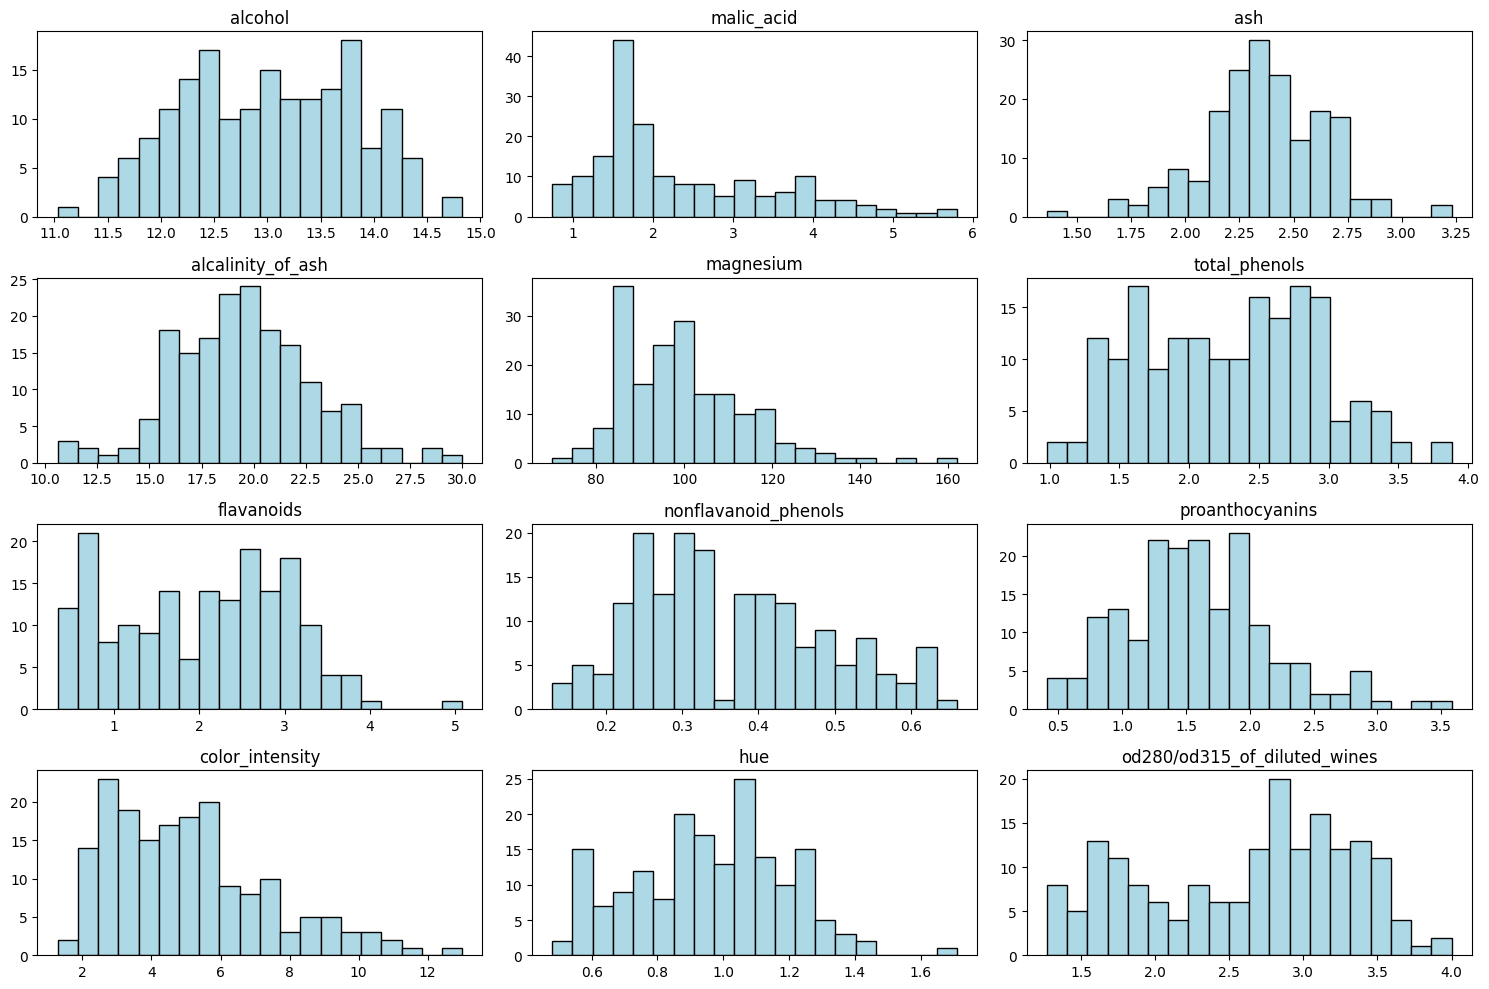

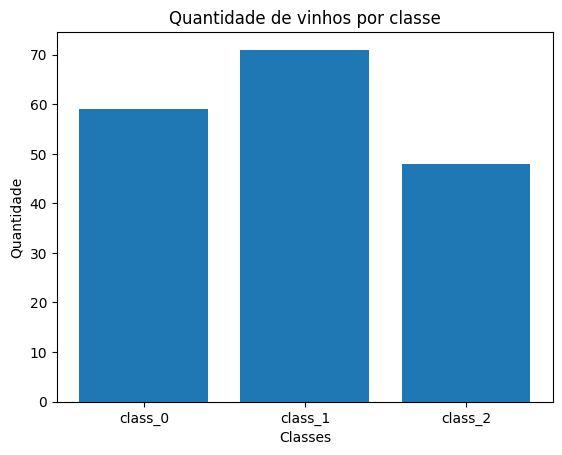

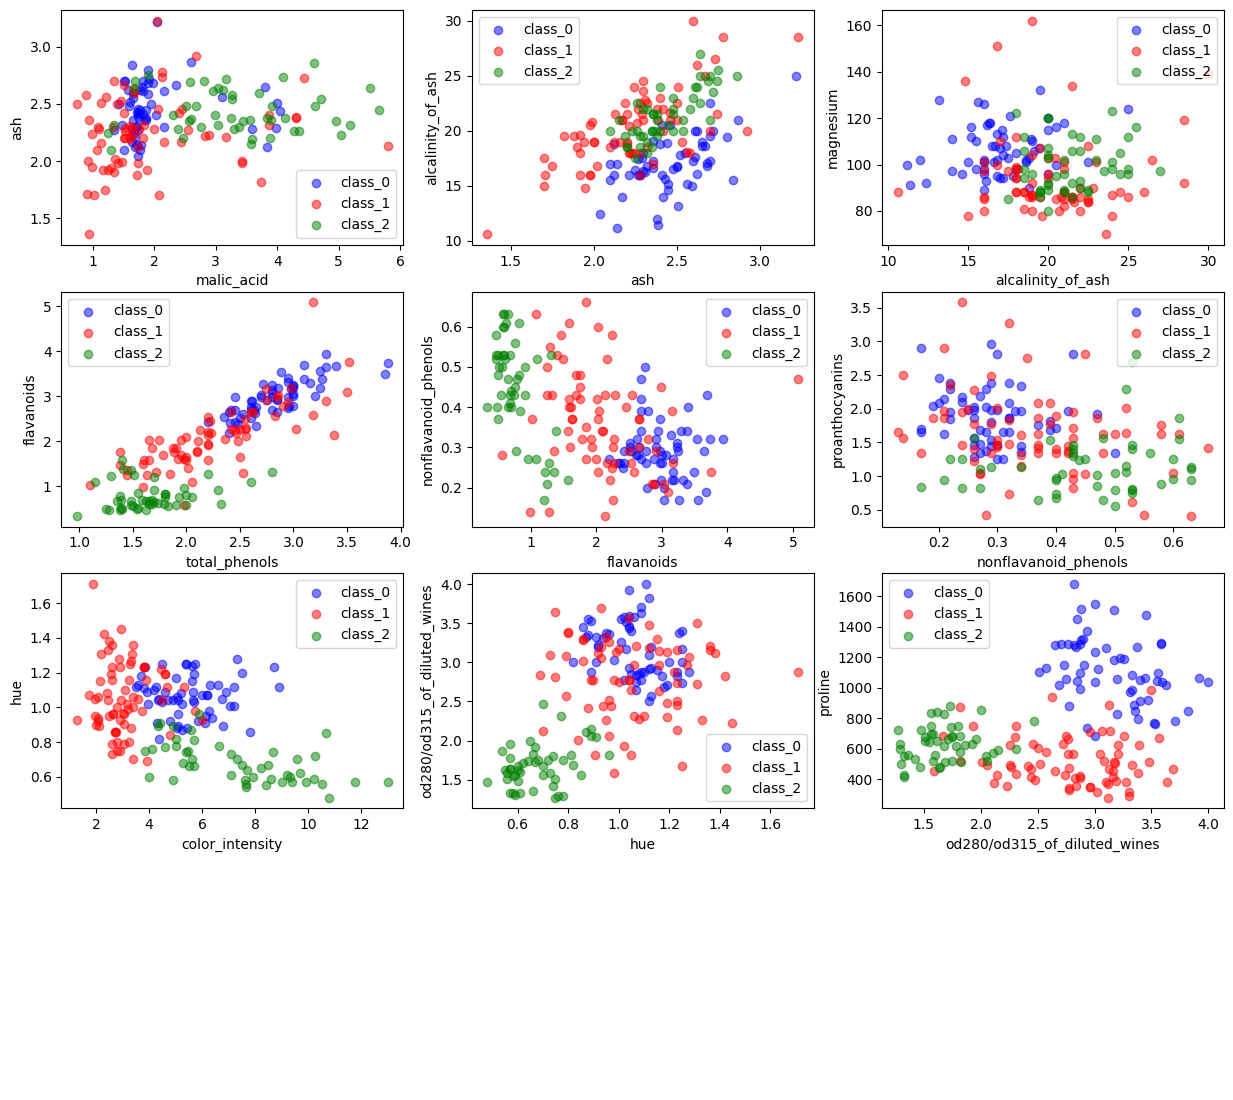

In [25]:
# carrega a base de dados do vinho
# Neste ponto não estou com as colunas normalizadas.
from sklearn.datasets import load_wine
wine = load_wine()


# plota histogramas das features
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    ax.hist(wine.data[:, i], bins=20, edgecolor='black', color='lightblue')
    ax.set(title=wine.feature_names[i])
plt.tight_layout()
plt.show()

# conta o número de instâncias em cada classe
counts = np.bincount(wine.target)

# plota gráfico de barras dos targets
fig, ax = plt.subplots()
ax.bar(range(len(wine.target_names)), counts)
ax.set(title='Quantidade de vinhos por classe', xlabel='Classes', ylabel='Quantidade', xticks=range(len(wine.target_names)), xticklabels=wine.target_names)
plt.show()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,10))

# Gráfico de dispersão
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        idx = i * 4 + j + 1
        if idx > 11: # se for o último subplot, não plota
            ax.axis('off')
            continue
        for target_name, target_label, target_color in zip(wine.target_names, [0, 1, 2], ['blue', 'red', 'green']):
            ax.scatter(wine.data[wine.target == target_label, idx], 
                       wine.data[wine.target == target_label, idx+1], 
                       color=target_color, alpha=0.5,
                       label=target_name)
        ax.set_xlabel(wine.feature_names[idx])
        ax.set_ylabel(wine.feature_names[idx+1])
        ax.legend(loc='best')

fig.subplots_adjust(bottom=-0.2)
plt.show()





## Árvore de decisão

In [26]:
# treina um modelo de árvore de decisão para prever a classe do vinho com base nas features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# separa os dados em treino e teste em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

# cria um modelo de árvore de decisão
tree = DecisionTreeClassifier(random_state=0)

# treina o modelo
tree.fit(X_train, y_train)

# calcula a acurácia do modelo nos dados de teste
accuracy = tree.score(X_test, y_test)
print('Acurácia do modelo: {:.3f}'.format(accuracy))

Acurácia do modelo: 0.972


## MATRIZ DE CORRELAÇÃO

In [27]:
import pandas as pd
from sklearn.datasets import load_wine

wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
correlation_matrix = df.corr()
print(f' Matriz de correlação em forma tabular: \n{correlation_matrix}')



 Matriz de correlação em forma tabular: 
                               alcohol  malic_acid       ash   
alcohol                       1.000000    0.094397  0.211545  \
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  to

### Mapa de calor

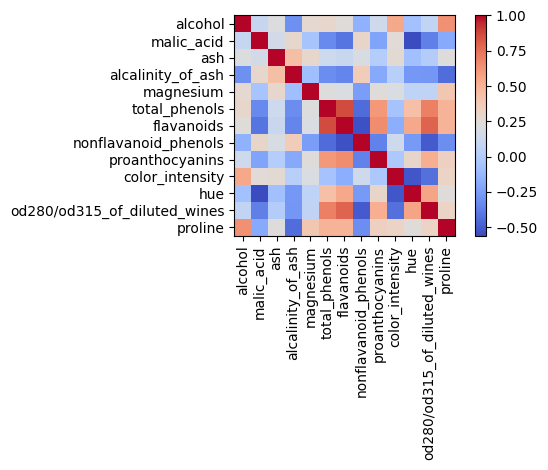

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# gerar matriz de correlação
correlation_matrix = np.corrcoef(wine_data.data.T)

# plotar matriz como imagem
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(wine_data.feature_names)), wine_data.feature_names, rotation=90)
plt.yticks(range(len(wine_data.feature_names)), wine_data.feature_names)


# ajustar layout do gráfico
plt.tight_layout()
plt.show()
# salvar gráfico em arquivo PNG
# Não funcionou!!!
#plt.savefig('correlation_matrix.png')